# More Olympic Hints

In [1]:
import numpy as np
from datascience import *

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# Fix for datascience plots
import collections as collections
import collections.abc as abc
collections.Iterable = abc.Iterable

## Formatted Strings (f-strings)
f-strings are a nice way to substitude python variable values within a print statement.

In [3]:
x = 12
print(f'The value of x is {x}.')

The value of x is 12.


In [4]:
# Example of f-string in a function.

def greeting(name):
    print(f'Hello {name}, how are you today?')
    
greeting('Dan')
greeting('Amanda')

Hello Dan, how are you today?
Hello Amanda, how are you today?


## Creating a datatable column from other columns

In [5]:
scores = Table().with_columns(
    "Name",  make_array('Dan', 'Amanda', 'Udoka'),
    "Lab 1", make_array(9, 6, 8),
    "Lab 2", make_array(2, 3, 0),
    "Lab 3", make_array(10, 8, 10)
)
scores

Name,Lab 1,Lab 2,Lab 3
Dan,9,2,10
Amanda,6,3,8
Udoka,8,0,10


The goal is to create a column "Average" with the sume of the three lab scores.

### Method 1: Extract the data. Do the math. Put it back in the table.

In [6]:
lab1 = scores.column('Lab 1')
lab2 = scores.column('Lab 2')
lab3 = scores.column('Lab 3')

lab1

array([9, 6, 8])

In [7]:
total = lab1 + lab2 + lab3
total

array([21, 17, 18])

In [8]:
scores_with_total = scores.with_column("Total", total)
scores_with_total

Name,Lab 1,Lab 2,Lab 3,Total
Dan,9,2,10,21
Amanda,6,3,8,17
Udoka,8,0,10,18


### Method 2: Make a function and apply it to the table.

In [9]:
def add_three(a, b, c):
    return a + b + c

# Test it
add_three(1, 2, 3)

6

In [10]:
scores_with_total = scores.with_column("Total", scores.apply(add_three, "Lab 1", "Lab 2", "Lab 3"))
scores_with_total

Name,Lab 1,Lab 2,Lab 3,Total
Dan,9,2,10,21
Amanda,6,3,8,17
Udoka,8,0,10,18


In [11]:
scores_with_total = scores.with_column("Total", scores.apply(np.average, "Lab 2"))
scores_with_total

Name,Lab 1,Lab 2,Lab 3,Total
Dan,9,2,10,2
Amanda,6,3,8,3
Udoka,8,0,10,0


## Dropping rows based on part of a string.

In [12]:
fav_flavor = Table().with_columns(
    "Name",
    make_array("Roger", "Sarina", "Dominic", "Lili", "Shinobu"),
    "Ice Cream Flavor",
    make_array("Vanilla", "Strawberry", "Cookies 'n Cream", "Strawberry Ripple", "Mint Chip")
)
fav_flavor

Name,Ice Cream Flavor
Roger,Vanilla
Sarina,Strawberry
Dominic,Cookies 'n Cream
Lili,Strawberry Ripple
Shinobu,Mint Chip


How do we drop any row containing mention of strawberry?

In [13]:
fav_flavor.where("Ice Cream Flavor", are.not_containing("Strawberry"))

Name,Ice Cream Flavor
Roger,Vanilla
Dominic,Cookies 'n Cream
Shinobu,Mint Chip


This looks for the substring "Strawberry" anywhere in the column entry, so it finds both "Strawberry" and "Strawberry Ripple"

## Making a Scatter Plot

In [14]:
x = np.arange(1, 20)
y1 = -(x**2)
y2 = x
y3 = x**2

polys = Table().with_columns(
    'x', x,
    'y1', y1,
    'y2', y2,
    'y3', y3
)
polys

x,y1,y2,y3
1,-1,1,1
2,-4,2,4
3,-9,3,9
4,-16,4,16
5,-25,5,25
6,-36,6,36
7,-49,7,49
8,-64,8,64
9,-81,9,81
10,-100,10,100


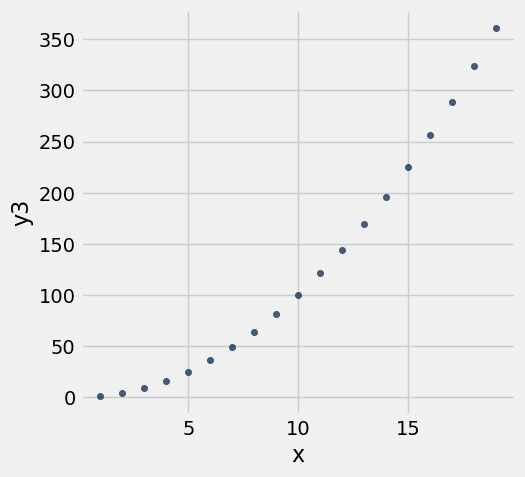

In [15]:
polys.scatter('x', 'y3')

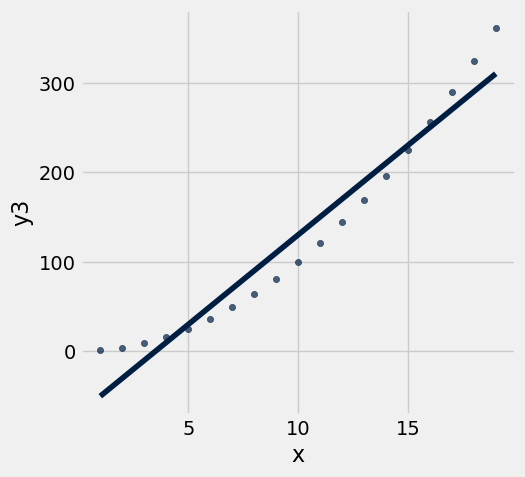

In [16]:
polys.scatter('x', 'y3', fit_line=True)

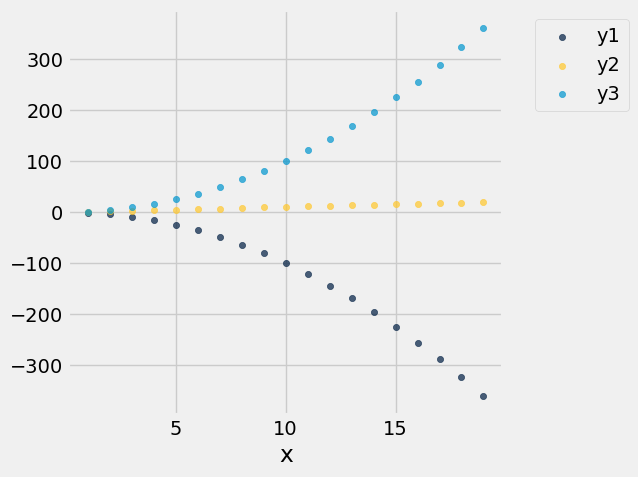

In [17]:
polys.scatter('x', ['y1', 'y2', 'y3'])

## A Brief Introduction to matplotlib

All of the plotting methods built into datatables are actually "syntactic sugar" -- shortcuts to using matplotlib. Here is an example of creating a [matplotlib](https://matplotlib.org) plot from scratch.

In [18]:
import matplotlib.pyplot as plt

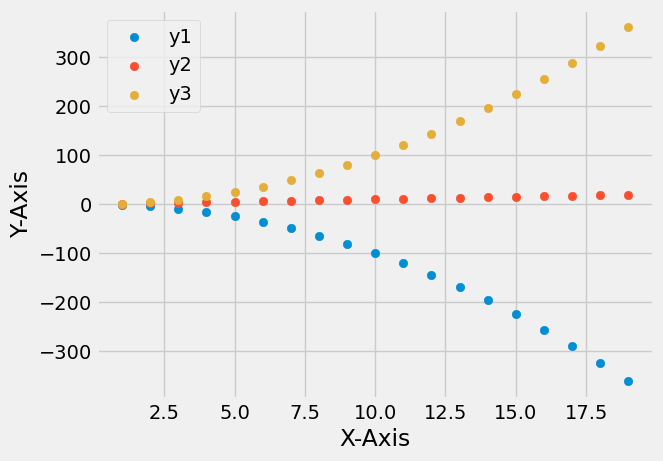

In [19]:
# Start by creating figure and axis objects
# In this case our figure has only one axis object, but you can create figures with multiple subplots
fig, ax = plt.subplots()

# Now we add to the axis our three scatter plots
ax.scatter(x, y1, label='y1')
ax.scatter(x, y2, label='y2')
ax.scatter(x, y3, label='y3')

# We modify the axes by setting the X and Y labels
ax.set_xlabel('X-Axis')
ax.set_ylabel('Y-Axis')

# Finally, we add the legend, which will using the labes we set in the calls to ax.scatter()
ax.legend()

Working with matplotlib means writing more lines of code to construct the plot, but it also gives you much more control over the final appearance of the plot.

For example:
* specify marker colors
* specify marker symbols
* change the legend font
* adding a title

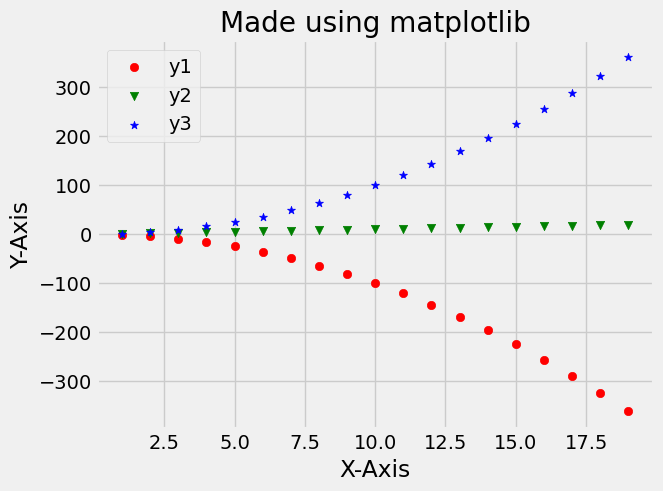

In [20]:
fig, ax = plt.subplots()
ax.scatter(x, y1, color='red', marker='o', label='y1')
ax.scatter(x, y2, color='green', marker='v', label='y2')
ax.scatter(x, y3, color='blue', marker='*', label='y3')
ax.set_xlabel('X-Axis')
ax.set_ylabel('Y-Axis')
ax.set_title('Made using matplotlib')
plt.legend()

Because the plots made using the datatable methods are matploblib plots behind the scene, we can use matplotlib to modify them after they are created. We just need to get the axis variable created by the datatable method.

Text(15, 150, 'Fav!')

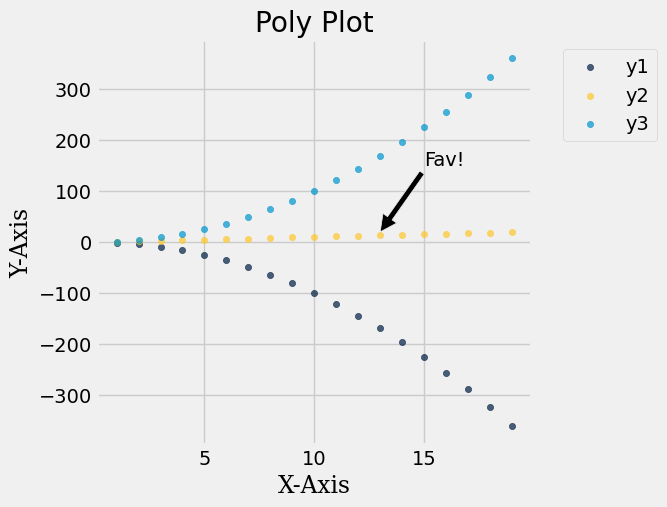

In [36]:
# Create the plot using the datatable method
polys.scatter('x', ['y1', 'y2', 'y3'])

# Get the plot axis
# gca stands for "get current axis"
ax = plt.gca()

# Use matplotlib functions to customize the figure

# Add a title
ax.set_title("Poly Plot")

# Just for fun, let's also change the font and text of the axis labels
ax.set_xlabel('X-Axis', fontname='DejaVu Serif')
ax.set_ylabel('Y-Axis', fontname='DejaVu Serif')

# And a text and arrow pointing to a particular point
ax.annotate('Fav!', xy=(13, 20), xytext=(15,150), arrowprops=dict(facecolor='black'))

It can be tedious to figure out how, but you you can do almost anything to a matplotlib imaginable! Fortunately, the defaults are generally all you need for this course.